# Exploratory Data Analysis (EDA) dari Data hasil Transform

In [134]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import re

In [135]:
# Load the dataset
products_used_features = pd.read_csv('../data/products_used_features.csv')
products_extracted_features = pd.read_csv('../data/products_extracted_features.csv')
products_integrated_features = pd.read_csv('../data/products_integrated_features.csv', encoding='ISO-8859-1')

## products_used_features

In [136]:
# Dataset products_used_features
products_used_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,age,rating_star
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"sorry aku kurang cocok sama produk ini, karena...",Dry,18 and Under,3.0
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",Combination,19 - 24,5.0
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",Combination,18 and Under,5.0
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,produk ini tu menurut aku cocok nya buat yang ...,Oily,18 and Under,3.0
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",Dry,18 and Under,4.0


In [137]:
# Cek information about the dataset
products_used_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            33844 non-null  object 
 1   product_name   33844 non-null  object 
 2   brand          33844 non-null  object 
 3   category       33844 non-null  object 
 4   price          28541 non-null  object 
 5   rating         33844 non-null  float64
 6   total_reviews  33844 non-null  int64  
 7   description    31398 non-null  object 
 8   review         33051 non-null  object 
 9   skin_type      31777 non-null  object 
 10  age            33027 non-null  object 
 11  rating_star    33051 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.1+ MB


In [138]:
# Cek jumlah data
print(f"Jumlah data pada products_used_features: {len(products_used_features)}")

Jumlah data pada products_used_features: 33844


In [139]:
# Cek data yang hilang
print("Data yang hilang pada products_used_features:")
print(products_used_features.isnull().sum())

Data yang hilang pada products_used_features:
url                 0
product_name        0
brand               0
category            0
price            5303
rating              0
total_reviews       0
description      2446
review            793
skin_type        2067
age               817
rating_star       793
dtype: int64


In [140]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_used_features: {products_used_features.duplicated().sum()}")

Jumlah data duplikat pada products_used_features: 357


# products_extracted_features

In [141]:
# Dataset products_extracted_features
products_extracted_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,...,rating_star,text_combined,found_ingredients,found_skin_concern,found_skin_type,found_skin_goal,std_skin_type,std_skin_concern,std_ingredients,std_skin_goal
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"sorry aku kurang cocok sama produk ini, karena...",Dry,...,3.0,"sorry aku kurang cocok sama produk ini, karena...",hyaluronic acid,kulit kering,"kulit normal, kulit kering",melembabkan,"dry, normal",dryness,hyaluronic acid,hydrating
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",Combination,...,5.0,"dipake buat csm-an enak bgt, teksturnya cair, ...",hyaluronic acid,"acne, jerawat",dry skin,NaN,dry,acne,hyaluronic acid,NaN
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",Combination,...,5.0,"luvvvv banget, calming muka kalo lagi rewel, l...",hyaluronic acid,kemerahan,NaN,NaN,NaN,redness,hyaluronic acid,NaN
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,produk ini tu menurut aku cocok nya buat yang ...,Oily,...,3.0,produk ini tu menurut aku cocok nya buat yang ...,hyaluronic acid,"acne, kulit kering",kulit kering,NaN,dry,"acne, dryness",hyaluronic acid,NaN
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,Rp. 29.000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",Dry,...,4.0,"di aku cukip bantu lembab tapi g kyk yg, woww ...",hyaluronic acid,NaN,dry skin,NaN,dry,NaN,hyaluronic acid,NaN


In [142]:
# Cek information about the dataset
products_extracted_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 33844 non-null  object 
 1   product_name        33844 non-null  object 
 2   brand               33844 non-null  object 
 3   category            33844 non-null  object 
 4   price               28541 non-null  object 
 5   rating              33844 non-null  float64
 6   total_reviews       33844 non-null  int64  
 7   description         31398 non-null  object 
 8   review              33051 non-null  object 
 9   skin_type           31777 non-null  object 
 10  age                 33027 non-null  object 
 11  rating_star         33051 non-null  float64
 12  text_combined       33844 non-null  object 
 13  found_ingredients   18920 non-null  object 
 14  found_skin_concern  18013 non-null  object 
 15  found_skin_type     9997 non-null   object 
 16  foun

In [143]:
# Cek jumlah data
print(f"Jumlah data pada products_extracted_features: {len(products_extracted_features)}")

Jumlah data pada products_extracted_features: 33844


In [144]:
# Cek missing data
print("Data yang hilang pada products_extracted_features:")
print(products_extracted_features.isnull().sum())

Data yang hilang pada products_extracted_features:
url                       0
product_name              0
brand                     0
category                  0
price                  5303
rating                    0
total_reviews             0
description            2446
review                  793
skin_type              2067
age                     817
rating_star             793
text_combined             0
found_ingredients     14924
found_skin_concern    15831
found_skin_type       23847
found_skin_goal       16149
std_skin_type         23847
std_skin_concern      15831
std_ingredients       14924
std_skin_goal         16149
dtype: int64


In [145]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_extracted_features: {products_extracted_features.duplicated().sum()}")

Jumlah data duplikat pada products_extracted_features: 357


# products_integrated_features

In [146]:
# Dataset products_integrated_features
products_integrated_features.head()

,url,product_name,brand,category,price,rating,skin_type,total_reviews,skin_concern,ingredients,skin_goal,age,rating_star
0,https://reviews.femaledaily.com/products/treat...,2.5,Benzolac,Acne treatment,15000,3.4,"['combination', 'oily']",67367,"['acne', 'irritation']","['salicylic acid', 'bha, retinol', 'centella a...",['calming'],19 - 24,4.267327
1,https://reviews.femaledaily.com/products/treat...,5,Benzolac,Acne treatment,22000,3.7,"['combination', 'oily']",10500,"['acne', 'dryness']","['vitamin c', 'bha', 'aha, bha, salicylic acid...",['non-comedogenic'],19 - 24,4.416667
2,https://reviews.femaledaily.com/products/treat...,10% Lactic + Glycolic Peeling Serum,Somethinc,Peeling,150000,4.0,"['dry', 'normal']",520,"['acne', 'blackheads']","['aha, allantoin, glycerin, panthenol, salicyl...","['brightening', 'hydrating']",25 - 29,4.750000
3,https://reviews.femaledaily.com/products/treat...,2 Minute Peeling Gel,Osho,Peeling,150000,3.9,"['combination', 'dry']",357,"['sensitive', 'irritation']",['aloe vera'],"['hydrating', 'smoothing']",19 - 24,4.647059
4,https://reviews.femaledaily.com/products/treat...,2% Salicylic Acid BHA Acne Spot Treatment,Skintific,Acne treatment,139000,3.9,"['combination', 'oily']",30856,"['acne', 'redness']","['centella asiatica, ceramide, niacinamide, sa...","['calming', 'fast-absorbing']",25 - 29,4.563910


In [147]:
# Cek information about the dataset
products_integrated_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            912 non-null    object 
 1   product_name   912 non-null    object 
 2   brand          912 non-null    object 
 3   category       912 non-null    object 
 4   price          912 non-null    int64  
 5   rating         912 non-null    float64
 6   skin_type      912 non-null    object 
 7   total_reviews  912 non-null    int64  
 8   skin_concern   912 non-null    object 
 9   ingredients    912 non-null    object 
 10  skin_goal      912 non-null    object 
 11  age            912 non-null    object 
 12  rating_star    912 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 92.8+ KB


In [148]:
# Cek jumlah data
print(f"Jumlah data pada products_integrated_features : {len(products_integrated_features)}")

Jumlah data pada products_integrated_features : 912


In [149]:
# Cek missing data
print("Data yang hilang pada products_integrated_features:")
print(products_integrated_features.isnull().sum())

Data yang hilang pada products_integrated_features:
url              0
product_name     0
brand            0
category         0
price            0
rating           0
skin_type        0
total_reviews    0
skin_concern     0
ingredients      0
skin_goal        0
age              0
rating_star      0
dtype: int64


In [150]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_integrated_features: {products_integrated_features.duplicated().sum()}")

Jumlah data duplikat pada products_integrated_features: 0


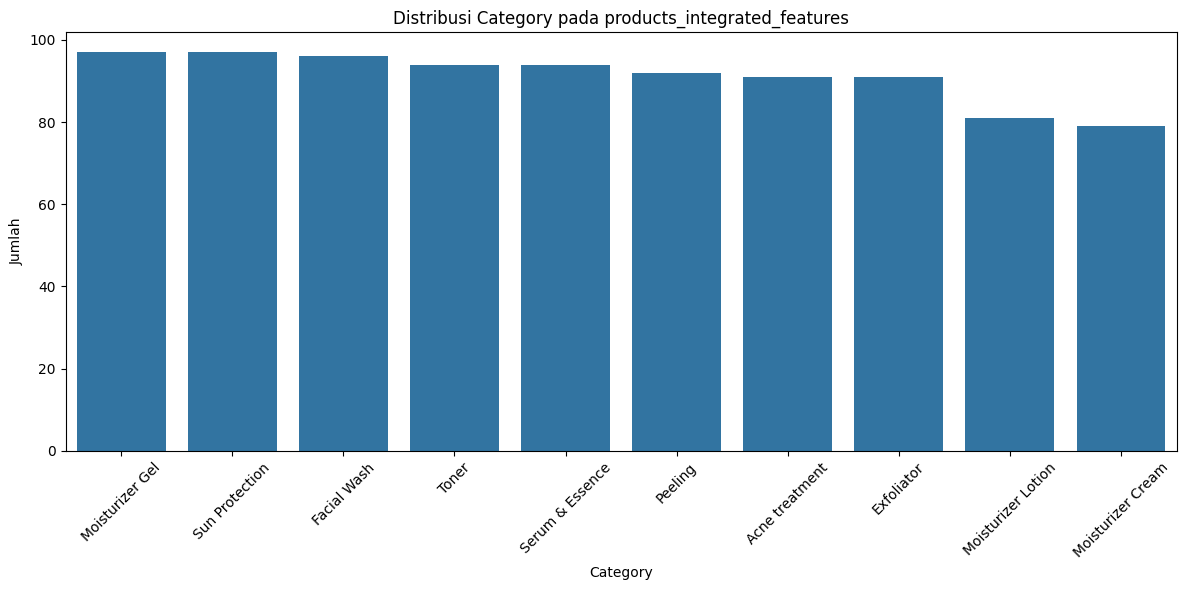

In [151]:
# Visualisasi distribusi categories pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='category', order=products_integrated_features['category'].value_counts().index)
plt.title('Distribusi Category pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [152]:
# Parsing string ke list, membersihkan, dan flatten
def parse_string(cell):
    try:
        # Ubah string list jadi list asli
        parsed = ast.literal_eval(cell)
    except:
        parsed = [cell]

    flat_list = []
    for item in parsed:
        if isinstance(item, str):
            # Split jika ada koma di dalam string
            parts = [part.strip().lower() for part in item.split(',')]
            for part in parts:
                # Bersihkan karakter seperti [ ] dan spasi ekstra
                clean = re.sub(r'[\[\]]', '', part).strip()
                if clean:
                    flat_list.append(clean)
        else:
            flat_list.append(str(item).strip().lower())

    return flat_list

In [153]:
# Apply ke kolom skin_type
products_integrated_features['skin_type_cleaned'] = products_integrated_features['skin_type'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_type:")
print(products_integrated_features['skin_type_cleaned'].head())

Contoh hasil parsing skin_type:
0    [combination, oily]
1    [combination, oily]
2          [dry, normal]
3     [combination, dry]
4    [combination, oily]
Name: skin_type_cleaned, dtype: object


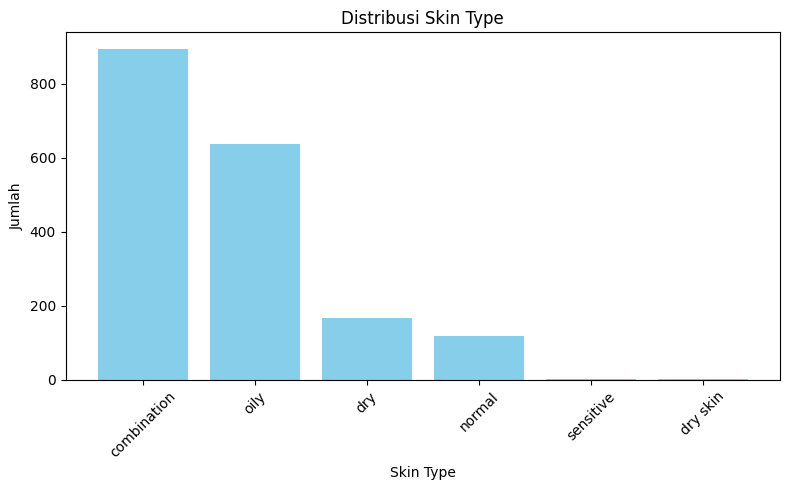

In [154]:
# Flatten semua list jadi satu list besar
all_skin_types = sum(products_integrated_features['skin_type_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_type_counts = Counter(all_skin_types)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_type_counts.keys(), skin_type_counts.values(), color='skyblue')
plt.title('Distribusi Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
# Apply ke kolom skin_concern
products_integrated_features['skin_concern_cleaned'] = products_integrated_features['skin_concern'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_type:")
print(products_integrated_features['skin_concern_cleaned'].head())

Contoh hasil parsing skin_type:
0         [acne, irritation]
1            [acne, dryness]
2         [acne, blackheads]
3    [sensitive, irritation]
4            [acne, redness]
Name: skin_concern_cleaned, dtype: object


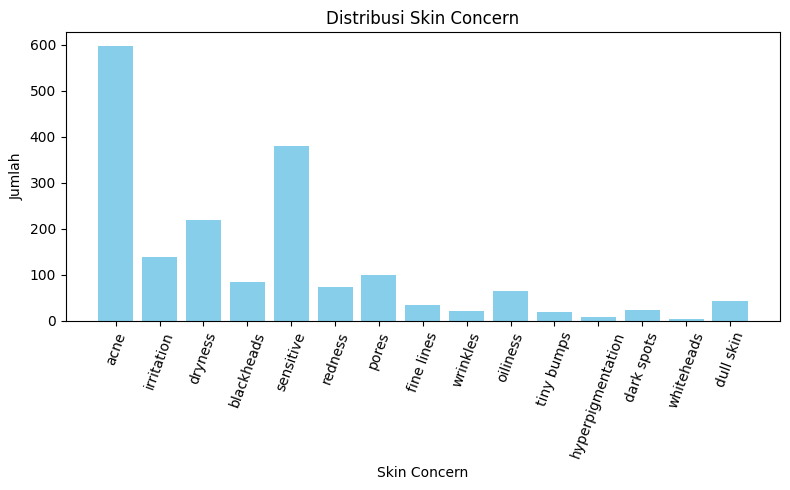

In [169]:
# Flatten semua list jadi satu list besar
all_skin_concern = sum(products_integrated_features['skin_concern_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_concern_counts = Counter(all_skin_concern)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_concern_counts.keys(), skin_concern_counts.values(), color='skyblue')
plt.title('Distribusi Skin Concern')
plt.xlabel('Skin Concern')
plt.ylabel('Jumlah')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [157]:
# Apply ke kolom skin_goal
products_integrated_features['skin_goal_cleaned'] = products_integrated_features['skin_goal'].apply(parse_string)

# Cek hasil parsing
print("Contoh hasil parsing skin_goal:")
print(products_integrated_features['skin_goal_cleaned'].head())

Contoh hasil parsing skin_goal:
0                    [calming]
1            [non-comedogenic]
2     [brightening, hydrating]
3       [hydrating, smoothing]
4    [calming, fast-absorbing]
Name: skin_goal_cleaned, dtype: object


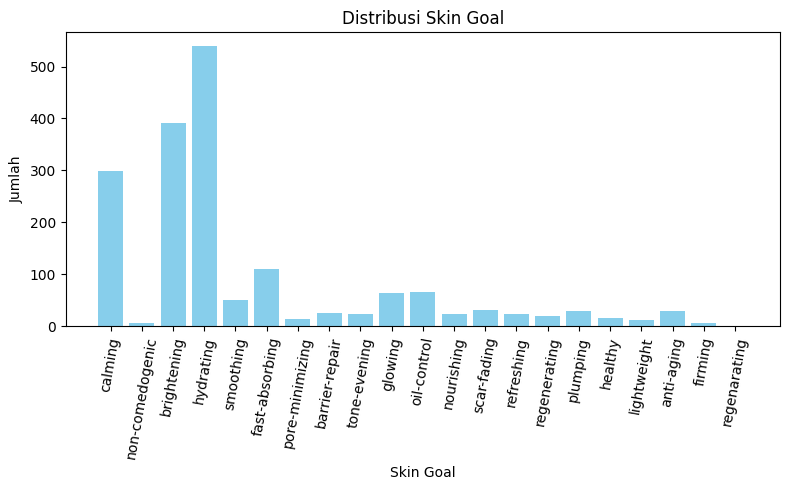

In [167]:
# Flatten semua list jadi satu list besar
all_skin_goal = sum(products_integrated_features['skin_goal_cleaned'], [])  # join semua list jadi satu list besar

# Hitung frekuensi
skin_goal_counts = Counter(all_skin_goal)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(skin_goal_counts.keys(), skin_goal_counts.values(), color='skyblue')
plt.title('Distribusi Skin Goal')
plt.xlabel('Skin Goal')
plt.ylabel('Jumlah')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

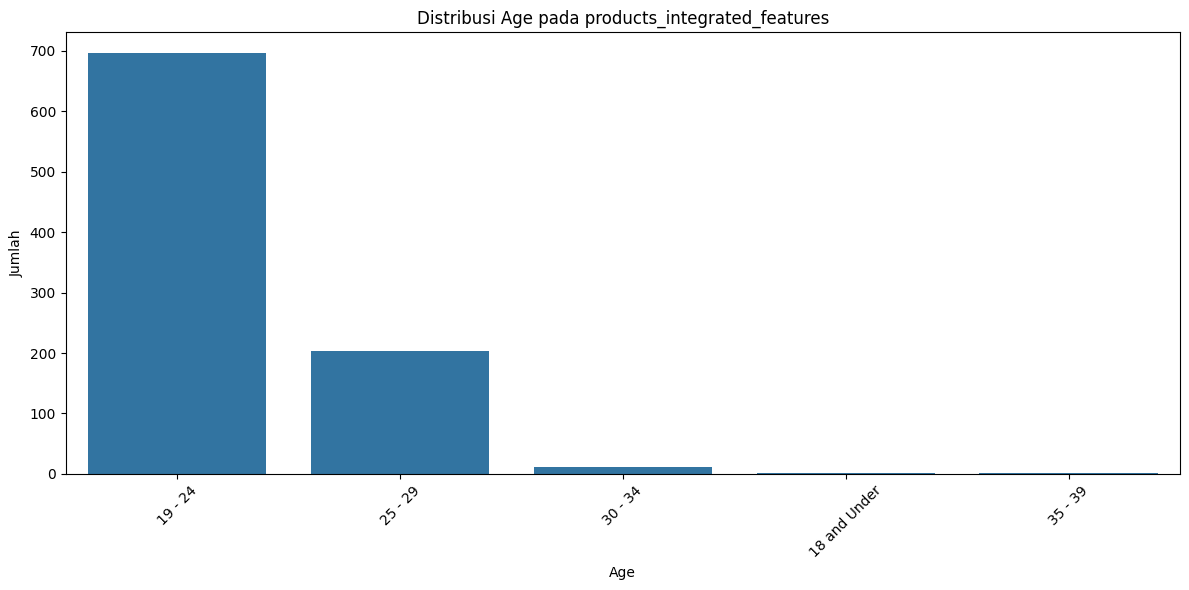

In [159]:
# Visualisasi distribusi age pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='age', order=products_integrated_features['age'].value_counts().index)
plt.title('Distribusi Age pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()